<a href="https://colab.research.google.com/github/mohansameer1983/Bank-Churn-Prediction/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Github Project - 
https://github.com/mohansameer1983/Bank-Churn-Prediction

In [432]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [434]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [435]:
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')

In [436]:
df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [437]:


df_raw.shape

(10000, 14)

In [438]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


In [439]:
df_raw.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [440]:
df_raw.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [441]:
#Identify duplicates records in the data
dupes = df_raw.duplicated()
sum(dupes)

0

In [442]:
# Drop non-relevant columns, which do not have impact on model
df = df_raw.copy()
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace=True)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Univariate Analysis

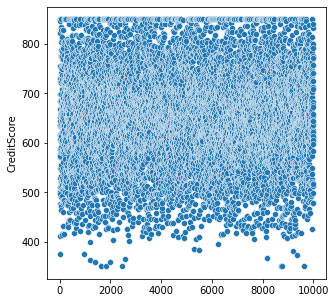

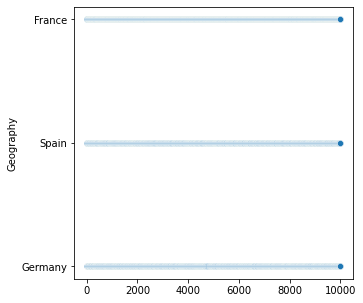

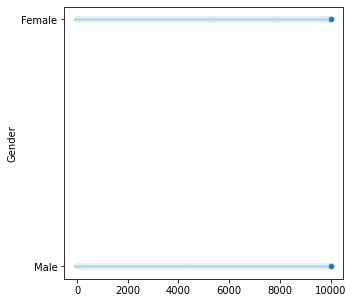

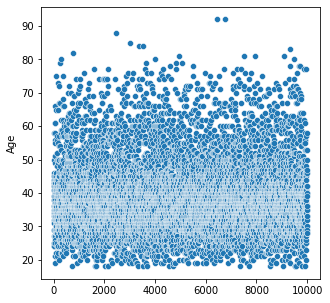

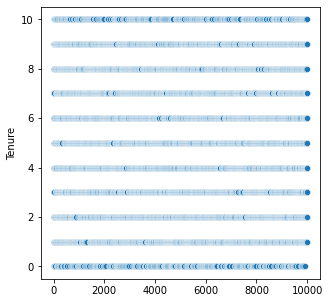

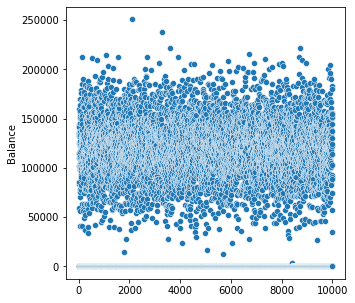

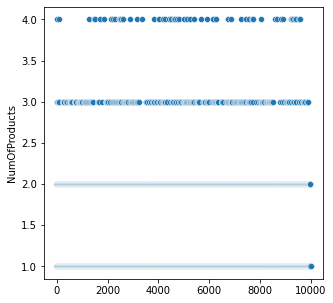

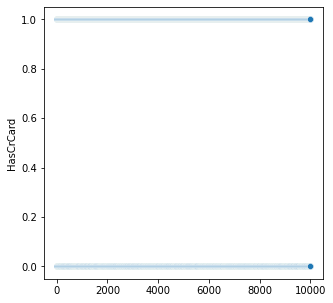

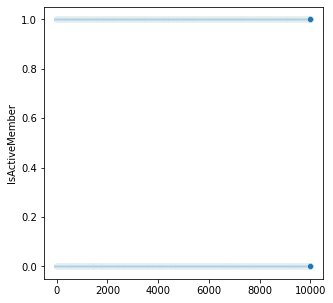

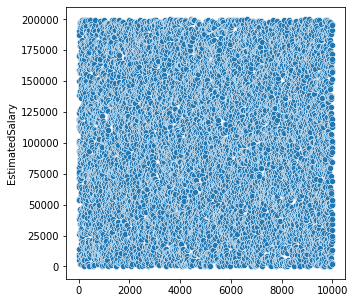

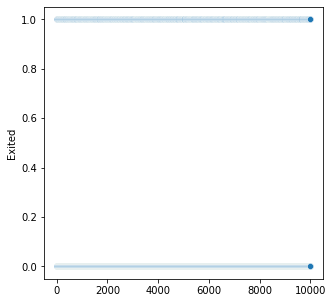

In [444]:
# Univariate Analysis
for i in df.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(data=df,y=i,x=df.index)
    plt.show()

**Few observations from univariate analysis**

---
* Age and Balance have outliers
* France, Spain and Germany are the only 3 geographies
* Credit Score may have outliers



## Encoding Categorical Columns

In [445]:
# Manual label encoding - Convert Gender/Geography columns to numeric
df.replace({'France' : 1, 'Germany' : 2, 'Spain' : 3, 'Male' : 0, 'Female' : 1}, inplace = True) 

In [446]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,3,1,43,2,125510.82,1,1,1,79084.10,0


## Bivariate Analysis

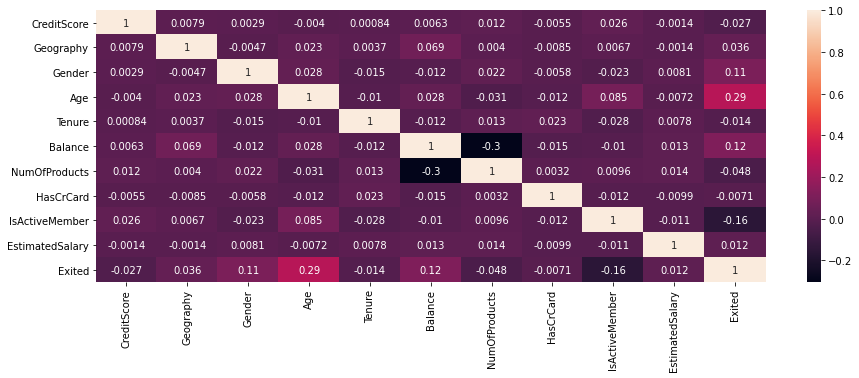

In [447]:
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot = True)

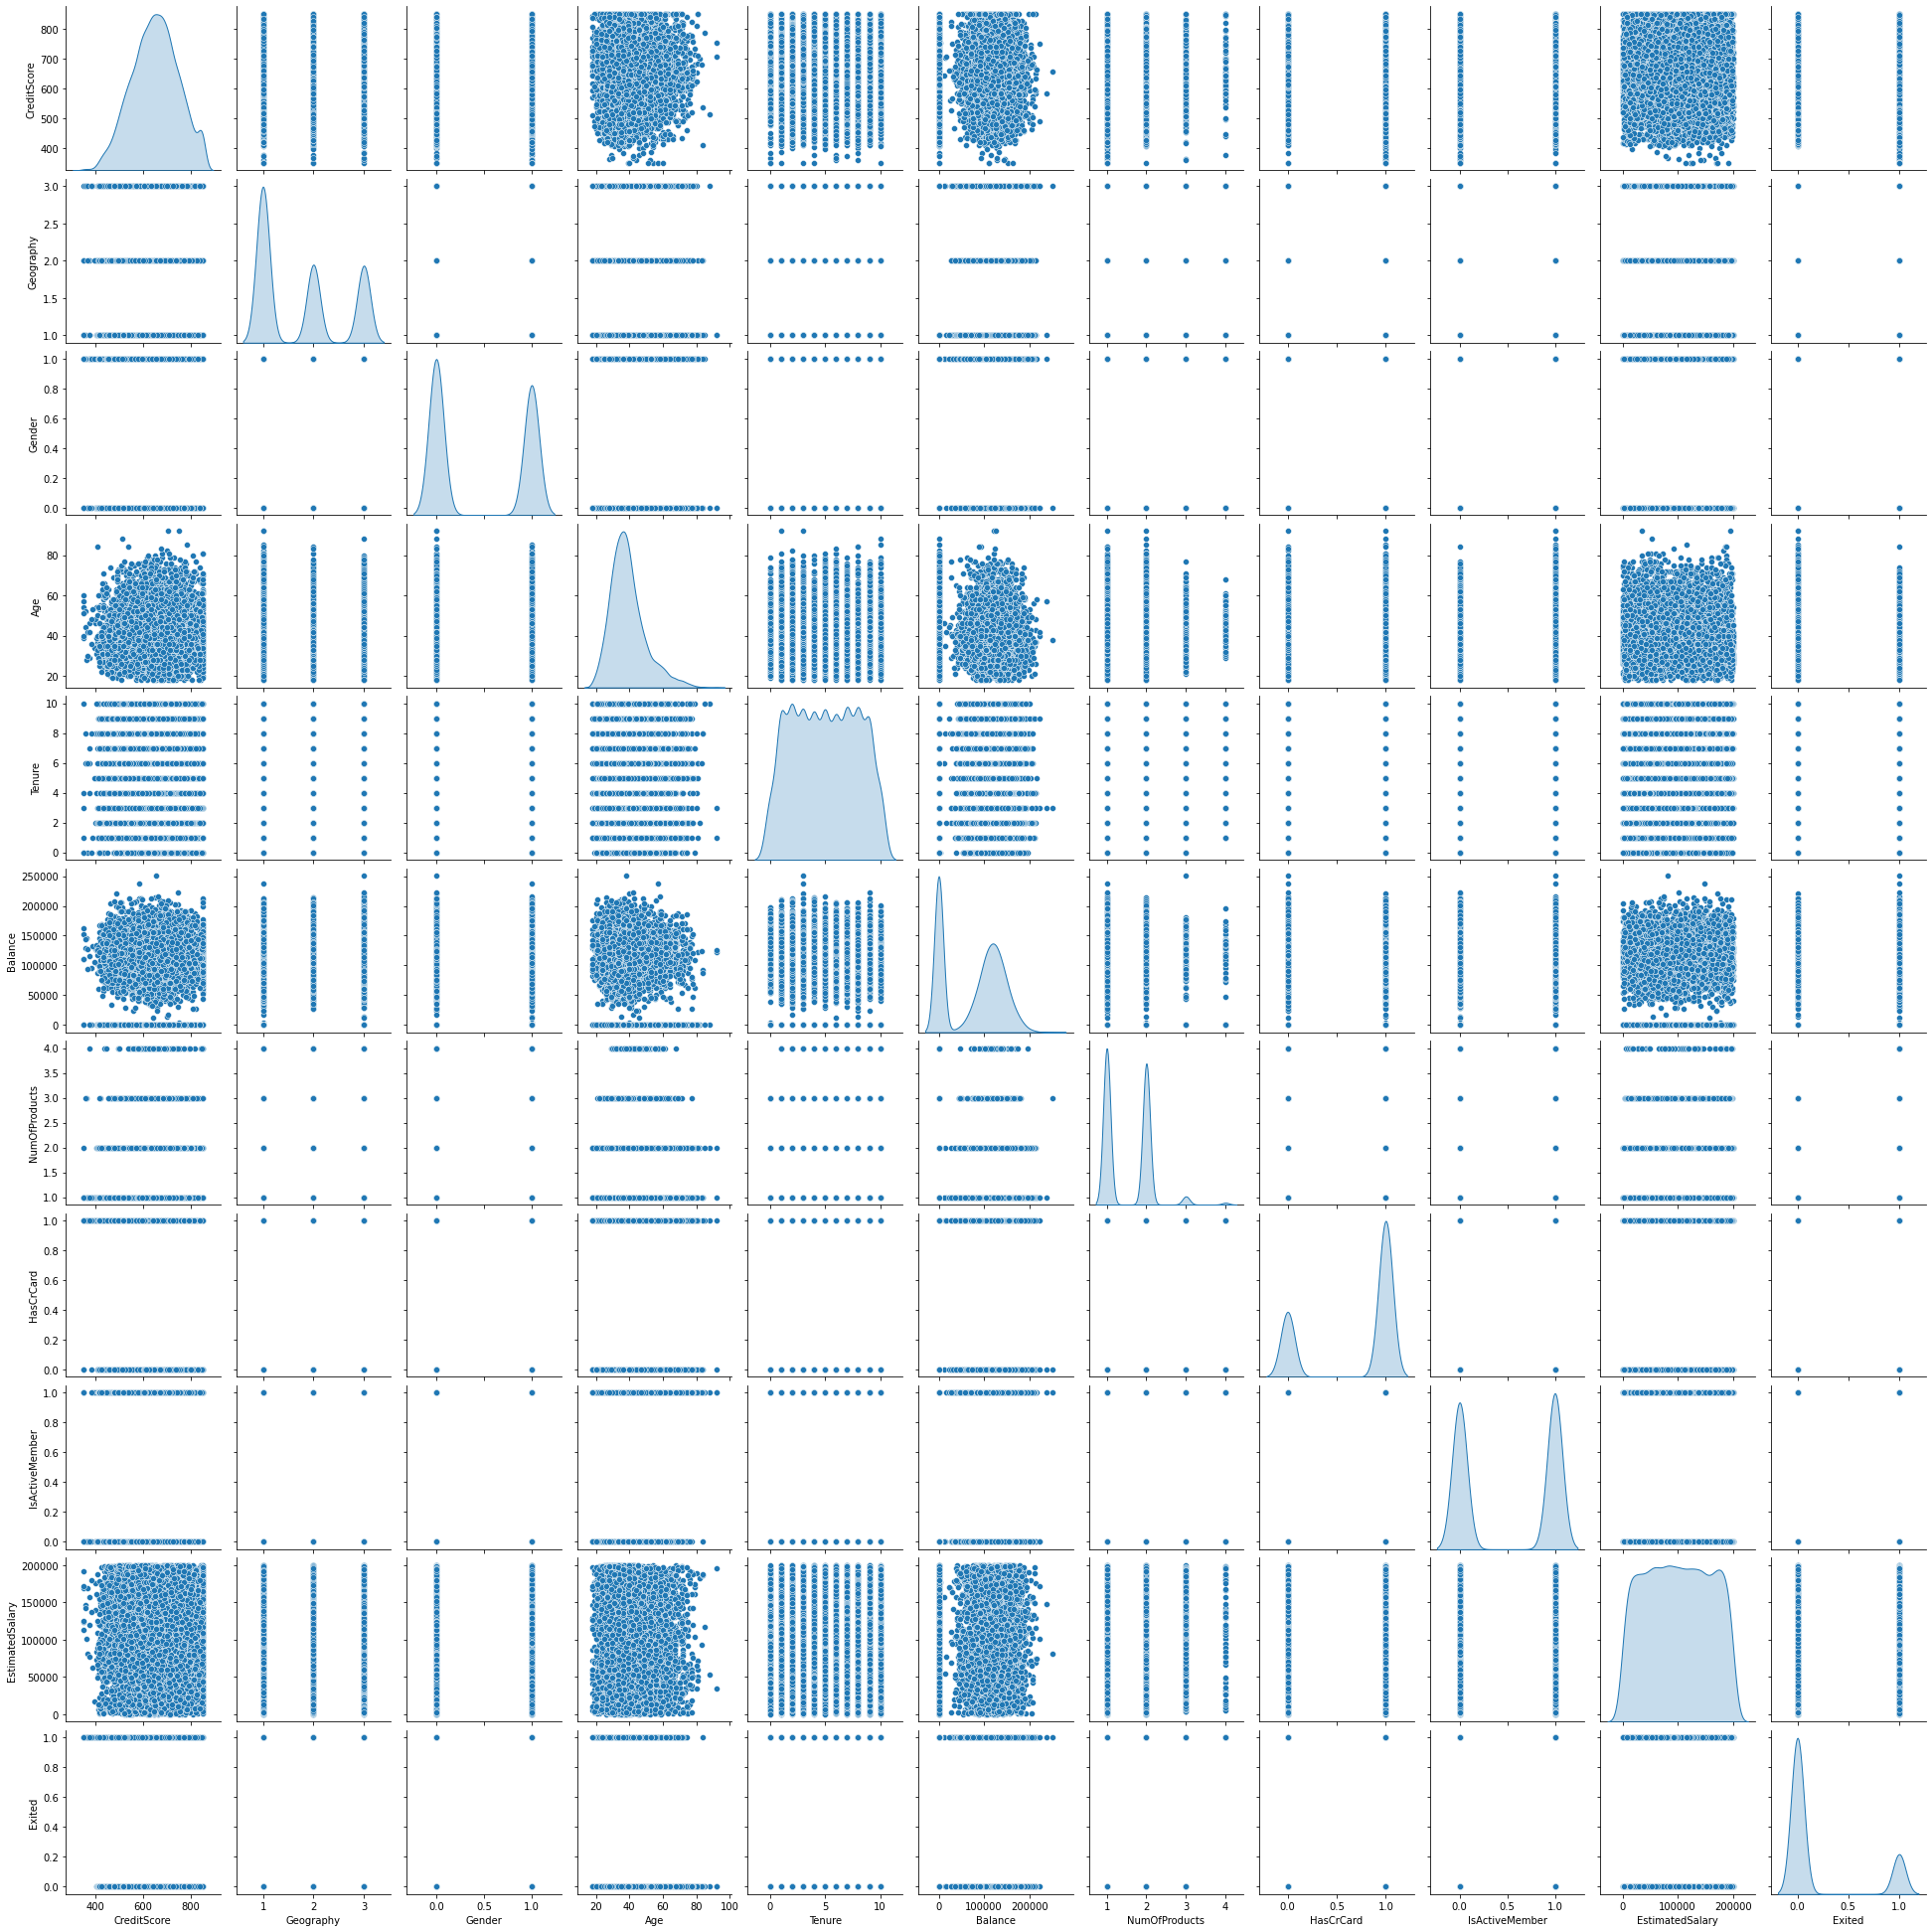

In [448]:
sns.pairplot(df,diag_kind='kde')

From above heatmap and pairplot, it seems that not much correlation exist between dependent and independent variables or between independent variables:

---

* There is some degree of negative correlation between Number of products and Balance.
* Very weak negative correlation between Gender and Exited Customers
* Weak positive correlation between Age and Exited customers.


## Outliers in Data

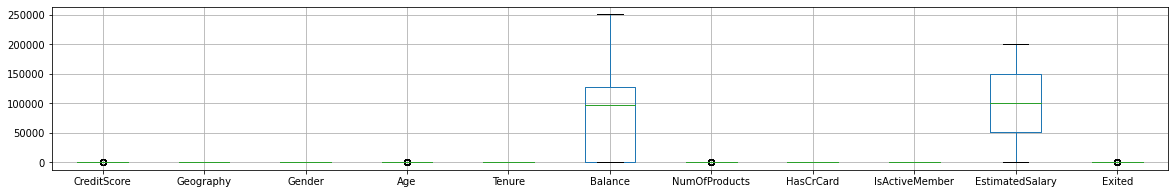

In [449]:
df.boxplot(figsize=(20,3))

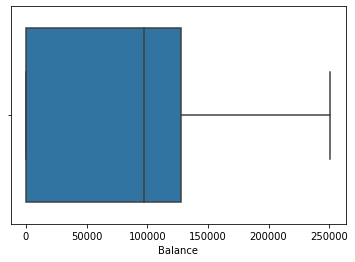

In [450]:
# Boxplot is very helpful in quickly analyzing outliers in data
sns.boxplot(x=df['Balance'])   # box plot
plt.show()

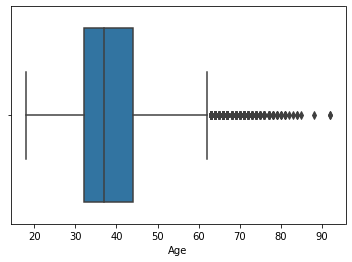

In [451]:
sns.boxplot(x=df['Age'])   # box plot
plt.show()

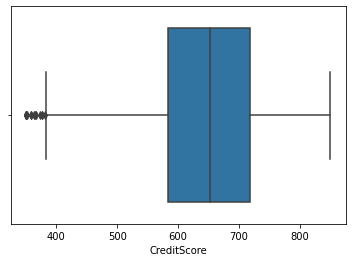

In [452]:
sns.boxplot(x=df['CreditScore'])   # box plot
plt.show()

**We can see outliers in CreditScore/Age columns, but lets leave them and see if they have any impact on model performance.**

## Split Data into Train and Test
'Exited' column is the target variable in this dataset. Lets divide data into target and feature columns in different datasets


In [468]:
from sklearn.preprocessing import StandardScaler

# Dividing data into two datasets: One for all features, and another for target field
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]

In [469]:
# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [470]:
# Normalize data before building neural network model.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [471]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


### Creating a model

In [472]:
# Initialize Sequential model from Keras library
model = Sequential()

### Adding layers [layers and activations]

In [473]:
# We will have 3 layers. First layer with 10 neurons matching with 10 feature columns. 
# Output layer will use sigmoid funtion, as this is binary classification, and it will output as 0 or 1.
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

### Model compile [optimizers and loss functions]

In [474]:
epochs = 155
batch_size=34
learning_rate = 0.001 # initial learning rate

loss='binary_crossentropy'
sgd = optimizers.Adam(lr = learning_rate)

In [475]:
model.compile(optimizer = sgd, loss = loss, metrics=['accuracy'])

### Training [Forward pass and Backpropagation]

In [476]:
model.fit(X_train, y_train.values, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/155
236/236 [==============================] - 1s 1ms/step - loss: 0.5734 - accuracy: 0.7876
Epoch 2/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.7987
Epoch 3/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7939
Epoch 4/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7995
Epoch 5/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.7965
Epoch 6/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.7900
Epoch 7/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.7992
Epoch 8/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.7975
Epoch 9/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8011
Epoch 10/155
236/236 [==============================] - 0s 1ms/step - loss: 0.4196 - accura

In [477]:
# Model Summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_55 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


### Evaluation


In [478]:
results = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 829us/step - loss: 0.3456 - accuracy: 0.8615


In [479]:
y_pred = np.round(model.predict(X_test))
y_pred = y_pred>0.5

In [480]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.74      0.50      0.60       411

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [481]:
print(model.metrics_names)
print(results)  

['loss', 'accuracy']
[0.34558579325675964, 0.8615000247955322]


### Confusion Matrix

In [482]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test, y_pred)

63/63 [==============================] - 0s 981us/step - loss: 0.3456 - accuracy: 0.8615


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy Model1 (Dropout): 0.8615000247955322
Recall_score: 0.49878345498783455
Precision_score: 0.7427536231884058
F-score: 0.5967976710334789


array([[1518,   71],
       [ 206,  205]])